<a href="https://colab.research.google.com/github/utkarsh-G-23/cvlab-tues/blob/main/1stlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

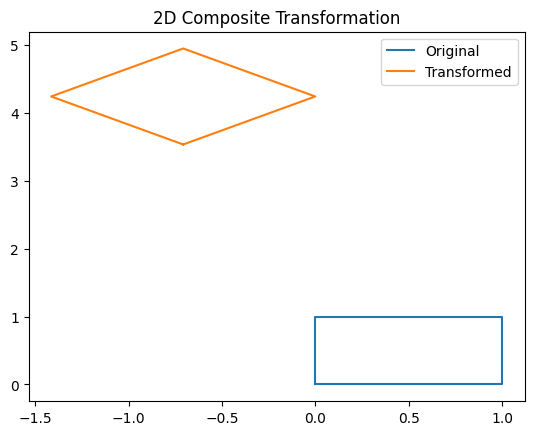

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Task 1: 2D Scaling Transformation on a 2D Object

def translate(points, tx, ty):
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return np.dot(transformation_matrix, points)

def scale(points, sx, sy):
    transformation_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return np.dot(transformation_matrix, points)

def rotate(points, angle):
    rad = np.deg2rad(angle)
    transformation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    return np.dot(transformation_matrix, points)

def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    return np.dot(transformation_matrix, points)

def shear(points, shx, shy):
    transformation_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return np.dot(transformation_matrix, points)

# Define a 2D rectangle
rectangle = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]  # Closing the rectangle
]).T

# Composite Transformation (Translate + Rotate)
def composite_transform(points):
    translated = translate(points, 2, 3)
    return rotate(translated, 45)

# Visualize Transformation
transformed_rectangle = composite_transform(rectangle)
plt.figure()
plt.plot(rectangle[0], rectangle[1], label='Original')
plt.plot(transformed_rectangle[0], transformed_rectangle[1], label='Transformed')
plt.legend()
plt.title('2D Composite Transformation')
plt.show()


In [ ]:
import cv2

# Load the image
image_path = "/content/example.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Failed to load the image. Check the file path.")
else:
    # Display image details
    print(f"Image loaded successfully from: {image_path}")
    print(f"Image shape: {image.shape}")  # Height, Width, Channels
    print(f"Image data type: {image.dtype}")
    print(f"Image size (in pixels): {image.size}")
    print(f"Image dimensions (H x W): {image.shape[:2]}")


Image loaded successfully from: /content/example.jpg
Image shape: (512, 512, 3)
Image data type: uint8
Image size (in pixels): 786432
Image dimensions (H x W): (512, 512)


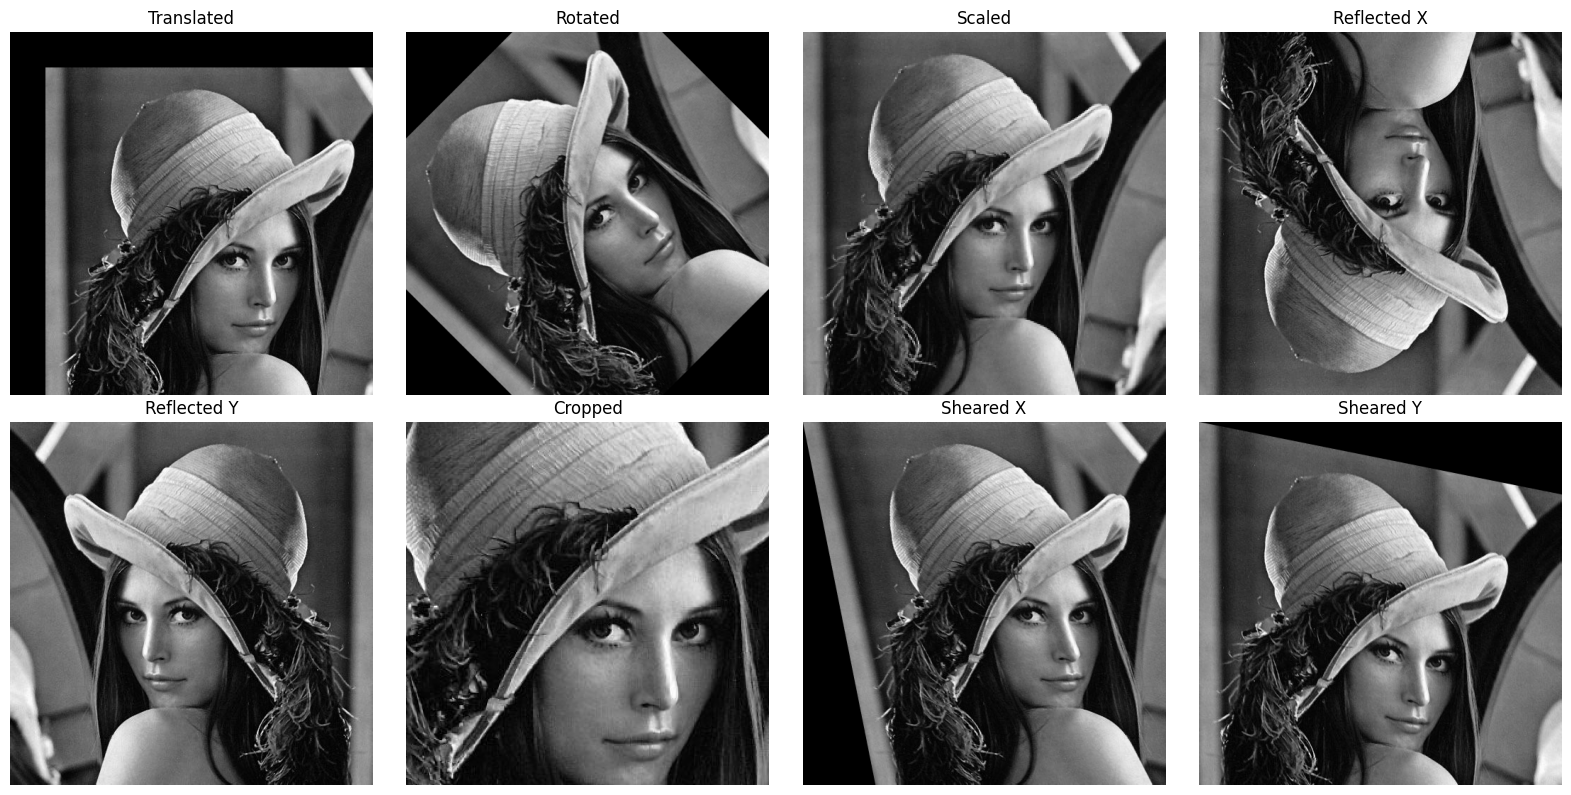

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Task 2: Image Transformations using OpenCV

# Load the image
image_path = "/content/example.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    raise FileNotFoundError("Failed to load image. Ensure the file path is correct.")

# Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

# Scaling
def scale_image(img, sx, sy):
    return cv2.resize(img, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

# Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Reflection
def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)

# Cropping
def crop_image(img, x, y, w, h):
    return img[y:y+h, x:x+w]

# Shearing in x-axis
def shear_image_x(img, shx):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, rows))

# Shearing in y-axis
def shear_image_y(img, shy):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, rows))

# Perform transformations on the image
translated_image = translate_image(image, 50, 50)
rotated_image = rotate_image(image, 45)
scaled_image = scale_image(image, 0.5, 0.5)
reflected_image_x = reflect_image(image, 'x')
reflected_image_y = reflect_image(image, 'y')
cropped_image = crop_image(image, 100, 100, 300, 300)
sheared_x_image = shear_image_x(image, 0.2)
sheared_y_image = shear_image_y(image, 0.2)

# Display transformed images using Matplotlib
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

transforms = [
    (translated_image, "Translated"),
    (rotated_image, "Rotated"),
    (scaled_image, "Scaled"),
    (reflected_image_x, "Reflected X"),
    (reflected_image_y, "Reflected Y"),
    (cropped_image, "Cropped"),
    (sheared_x_image, "Sheared X"),
    (sheared_y_image, "Sheared Y")
]

for ax, (img, title) in zip(axes, transforms):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


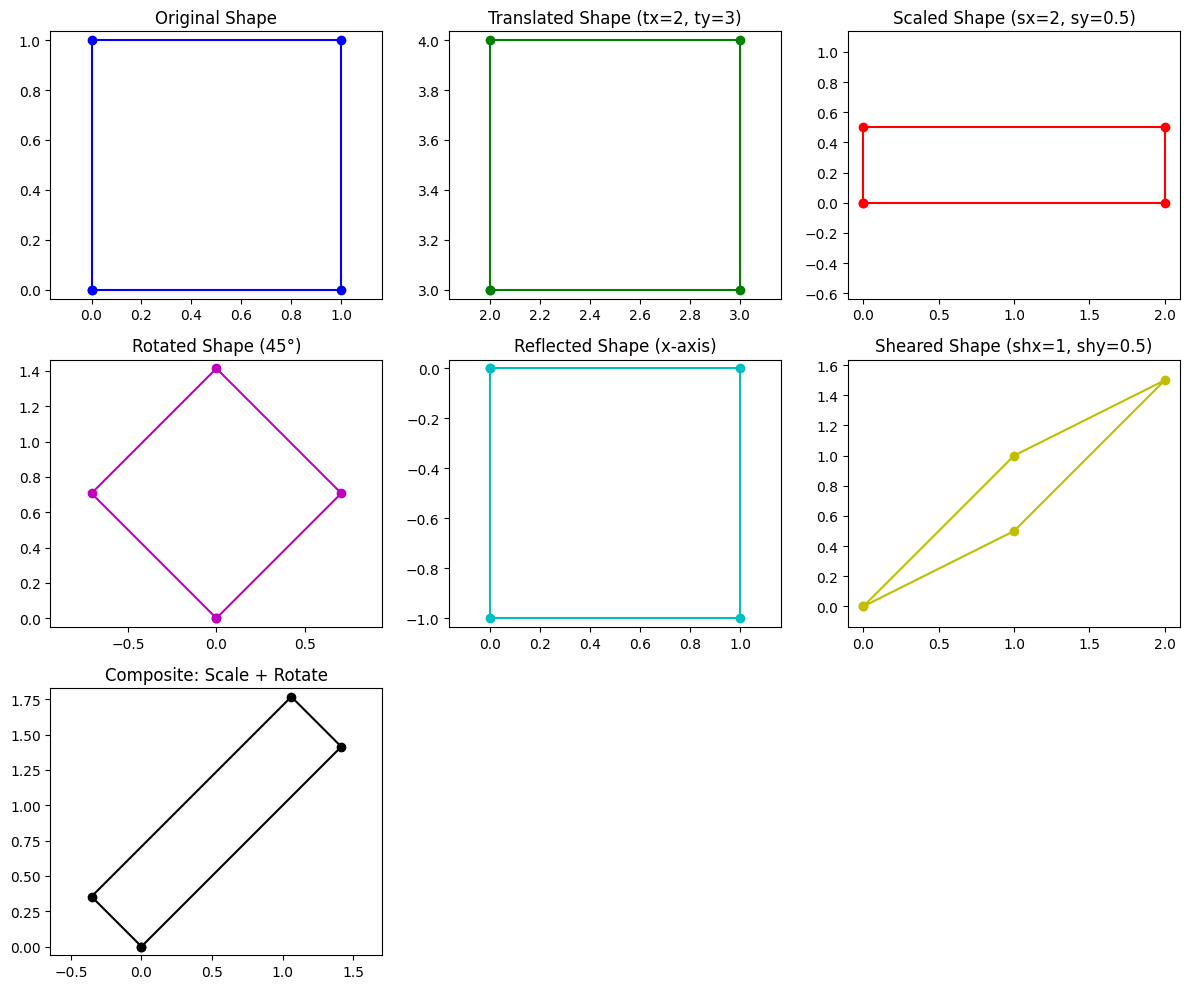

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(points, title, color='b'):
    """Plot a 2D shape given its vertices."""
    points = np.append(points, [points[0]], axis=0)  # Close the shape
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')

def translate(points, tx, ty):
    """Perform translation on a 2D object."""
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ translation_matrix.T
    return transformed_points[:, :2]

def scale(points, sx, sy):
    """Perform scaling on a 2D object."""
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ scaling_matrix.T
    return transformed_points[:, :2]

def rotate(points, angle):
    """Perform rotation on a 2D object."""
    radians = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ rotation_matrix.T
    return transformed_points[:, :2]

def reflect(points, axis):
    """Perform reflection on a 2D object."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ reflection_matrix.T
    return transformed_points[:, :2]

def shear(points, shx, shy):
    """Perform shearing on a 2D object."""
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ shearing_matrix.T
    return transformed_points[:, :2]

def composite_transform(points, transformations):
    """Perform composite transformations on a 2D object."""
    composite_matrix = np.eye(3)
    for transform in transformations:
        composite_matrix = transform @ composite_matrix
    points_h = np.c_[points, np.ones(points.shape[0])]  # Convert to homogeneous coordinates
    transformed_points = points_h @ composite_matrix.T
    return transformed_points[:, :2]

# Define a square as the 2D object
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Plot the original shape
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
plot_shape(square, "Original Shape", 'b')

# Apply transformations and plot results
# Translation
translated_square = translate(square, 2, 3)
plt.subplot(3, 3, 2)
plot_shape(translated_square, "Translated Shape (tx=2, ty=3)", 'g')

# Scaling
scaled_square = scale(square, 2, 0.5)
plt.subplot(3, 3, 3)
plot_shape(scaled_square, "Scaled Shape (sx=2, sy=0.5)", 'r')

# Rotation
rotated_square = rotate(square, 45)
plt.subplot(3, 3, 4)
plot_shape(rotated_square, "Rotated Shape (45°)", 'm')

# Reflection
reflected_square = reflect(square, 'x')
plt.subplot(3, 3, 5)
plot_shape(reflected_square, "Reflected Shape (x-axis)", 'c')

# Shearing
sheared_square = shear(square, 1, 0.5)
plt.subplot(3, 3, 6)
plot_shape(sheared_square, "Sheared Shape (shx=1, shy=0.5)", 'y')

# Composite Transformation: Scale + Rotate
scaling_matrix = np.array([[2, 0, 0], [0, 0.5, 0], [0, 0, 1]])
rotation_matrix = np.array([
    [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
    [np.sin(np.radians(45)), np.cos(np.radians(45)), 0],
    [0, 0, 1]
])
composite_square = composite_transform(square, [scaling_matrix, rotation_matrix])
plt.subplot(3, 3, 7)
plot_shape(composite_square, "Composite: Scale + Rotate", 'k')

plt.tight_layout()
plt.show()